In [497]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from statsmodels.formula.api import ols
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats





In [460]:
# from kaggle this is a dataset of MyAnimeList.net of popular anime

# exporting csv file to a DataFrame only using columns listed
data = pd.read_csv("myAnimelist-No_Hentai.csv", usecols=['name','type','source','episodes','duration','rating', 'score', 'scored_by','rank','popularity','members', 'favorites']) 
data_number_set = pd.read_csv("myAnimelist-No_Hentai.csv", usecols=['episodes', 'score', 'scored_by','rank','popularity','members', 'favorites']) 

# dropping all null values
data.dropna(inplace = True) 

 

In [461]:
data

,name,duration,episodes,type,source,rating,score,scored_by,rank,popularity,members,favorites
0,Super Child,1:41,1,Movie,Unknown,PG-13 - Teens 13 or older,2.82,381,10281,9292,789,2
1,Gold Pencil And Alien Boy,1:05,1,Movie,Unknown,None,3.04,49,11023,12627,170,0
2,Takoyaki Story,0:01,1,Music,Original,R+ - Mild Nudity,3.28,25,13254,15083,46,0
3,Geisters Movie: Hikari no Shou,1:40,1,Movie,Original,PG-13 - Teens 13 or older,3.36,11,11006,14053,101,0
4,Xiong Chumo Zhi: Guonian,1:08,1,Special,Original,PG - Children,3.41,17,13641,14790,62,0
5,Uju Heukgisa,1:10,1,Movie,Unknown,PG - Children,3.42,240,10265,10204,497,3
6,Dead Girl Trailer,0:01,1,ONA,Original,R - 17+ (violence & profanity),3.43,974,10264,8008,1477,0
7,C.L.A.Y.,0:01,1,ONA,Original,R - 17+ (violence & profanity),3.48,1276,10258,7507,1881,0
8,No Littering,0:01,1,ONA,Original,R - 17+ (violence & profanity),3.52,2186,10254,6419,3047,1
9,Dead World,0:01,1,ONA,Original,R - 17+ (violence & profanity),3.57,469,10273,8657,1109,0


### Stat functions

In [ ]:
def calc_slope(xs, ys):

    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

def best_fit(xs, ys):

    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c

def reg_line (m, c, X):
    
    return [(m*x)+c for x in X]

def sum_sq_err(ys_real, ys_predicted):

    sse =  sum((ys_predicted - ys_real) * (ys_predicted - ys_real))
    
    return sse

def r_squared(ys_real, ys_predicted):
    
    # Calculate Y_mean , squared error for regression and mean line , and calculate r-squared
    y_mean = [np.mean(ys_real) for y in ys_real]

    sq_err_reg = sum_sq_err(ys_real, ys_predicted)
    sq_err_y_mean = sum_sq_err(ys_real, y_mean)
    
    # Calculate r-squared 
    r_sq =  1 - (sq_err_reg/sq_err_y_mean)
    
    return r_sq

def plot_reg(X, Y, Y_pred):
    plt.scatter(X, Y, color='#003F72', label='data')
    plt.plot(X, Y_pred, label='regression line')
    plt.legend(loc=4)
    plt.show()
    return None

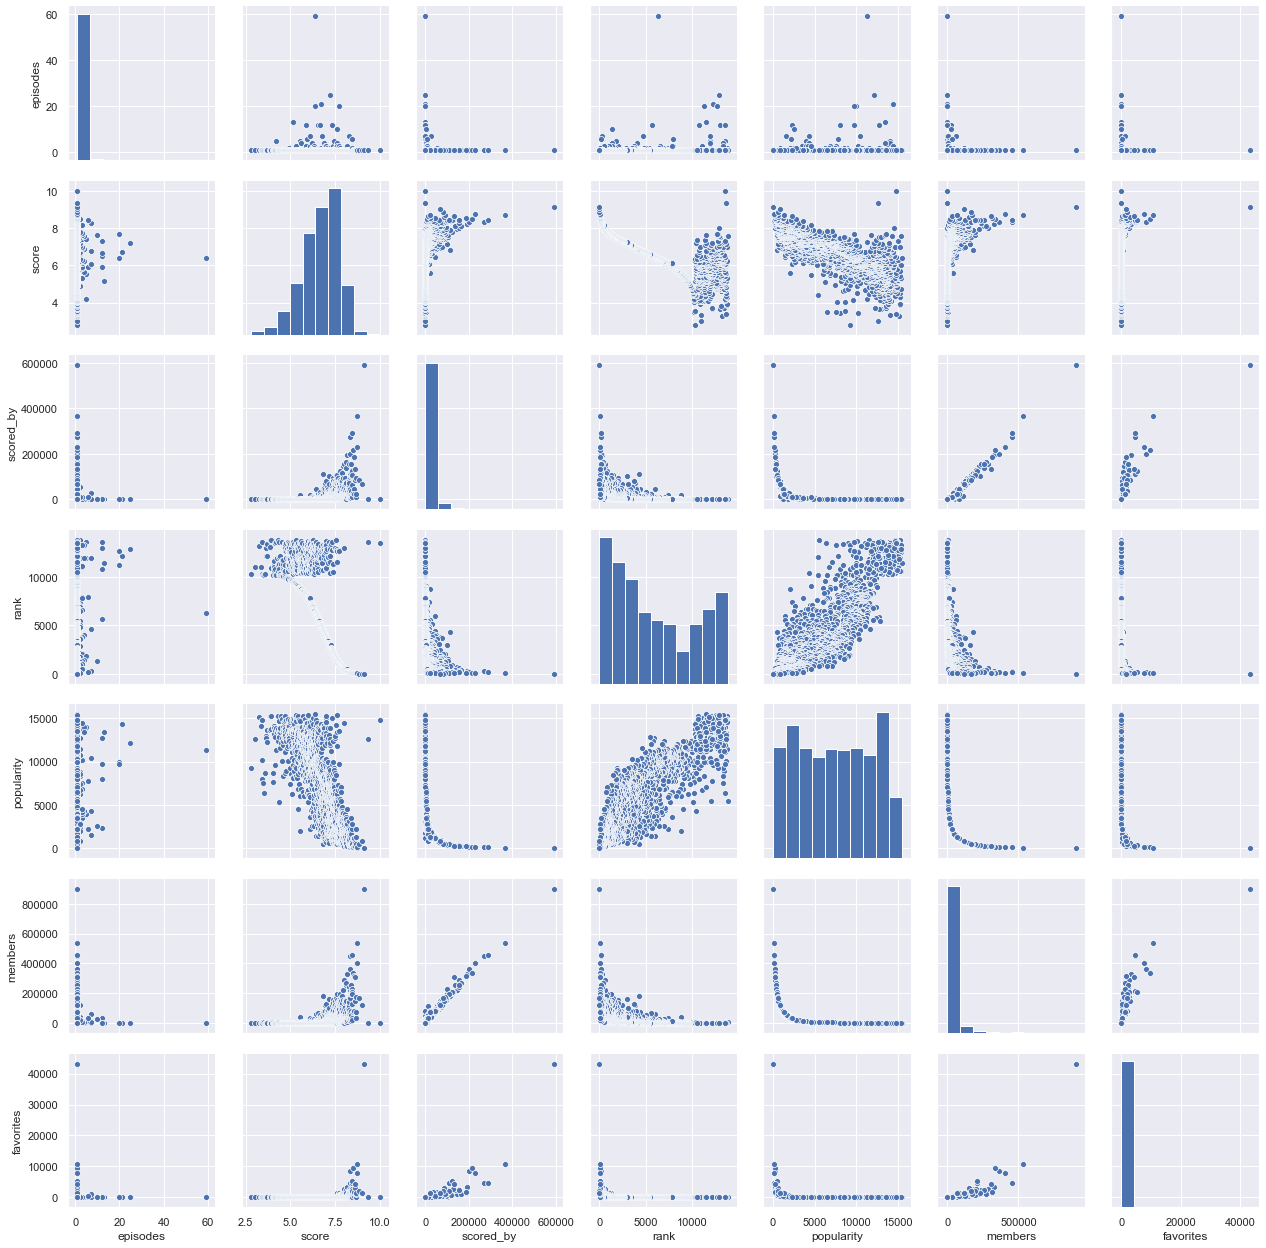

In [498]:
sns.pairplot(data)

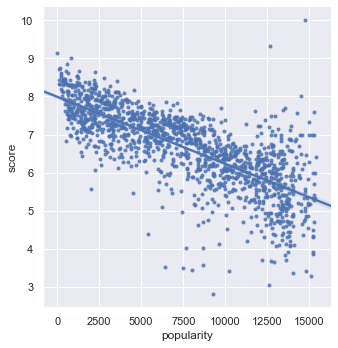

In [288]:

sns.lmplot(x='popularity', y='score', data= data, markers=[ "."], fit_reg =True)
# sns.set(rc={'figure.figsize':(100,100)})

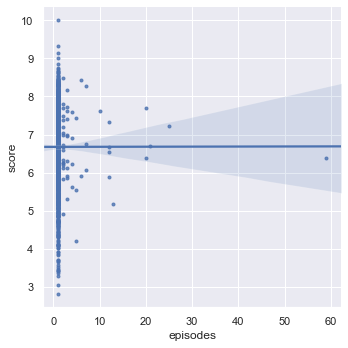

In [289]:
sns.lmplot(x='episodes', y='score', data= data, markers=[ "."], fit_reg =True)

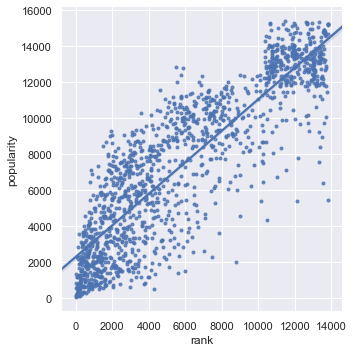

In [315]:
sns.lmplot(x='rank', y='popularity', data= data, markers=[ "."], fit_reg =True)

### Checking the relationships between the different categories

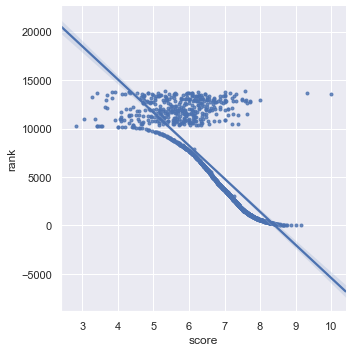

In [515]:
sns.lmplot(x='score', y='rank', data= data, markers=[ "."], fit_reg =True)

In [292]:
data.columns

Index(['name', 'duration', 'episodes', 'type', 'source', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites'],
      dtype='object')

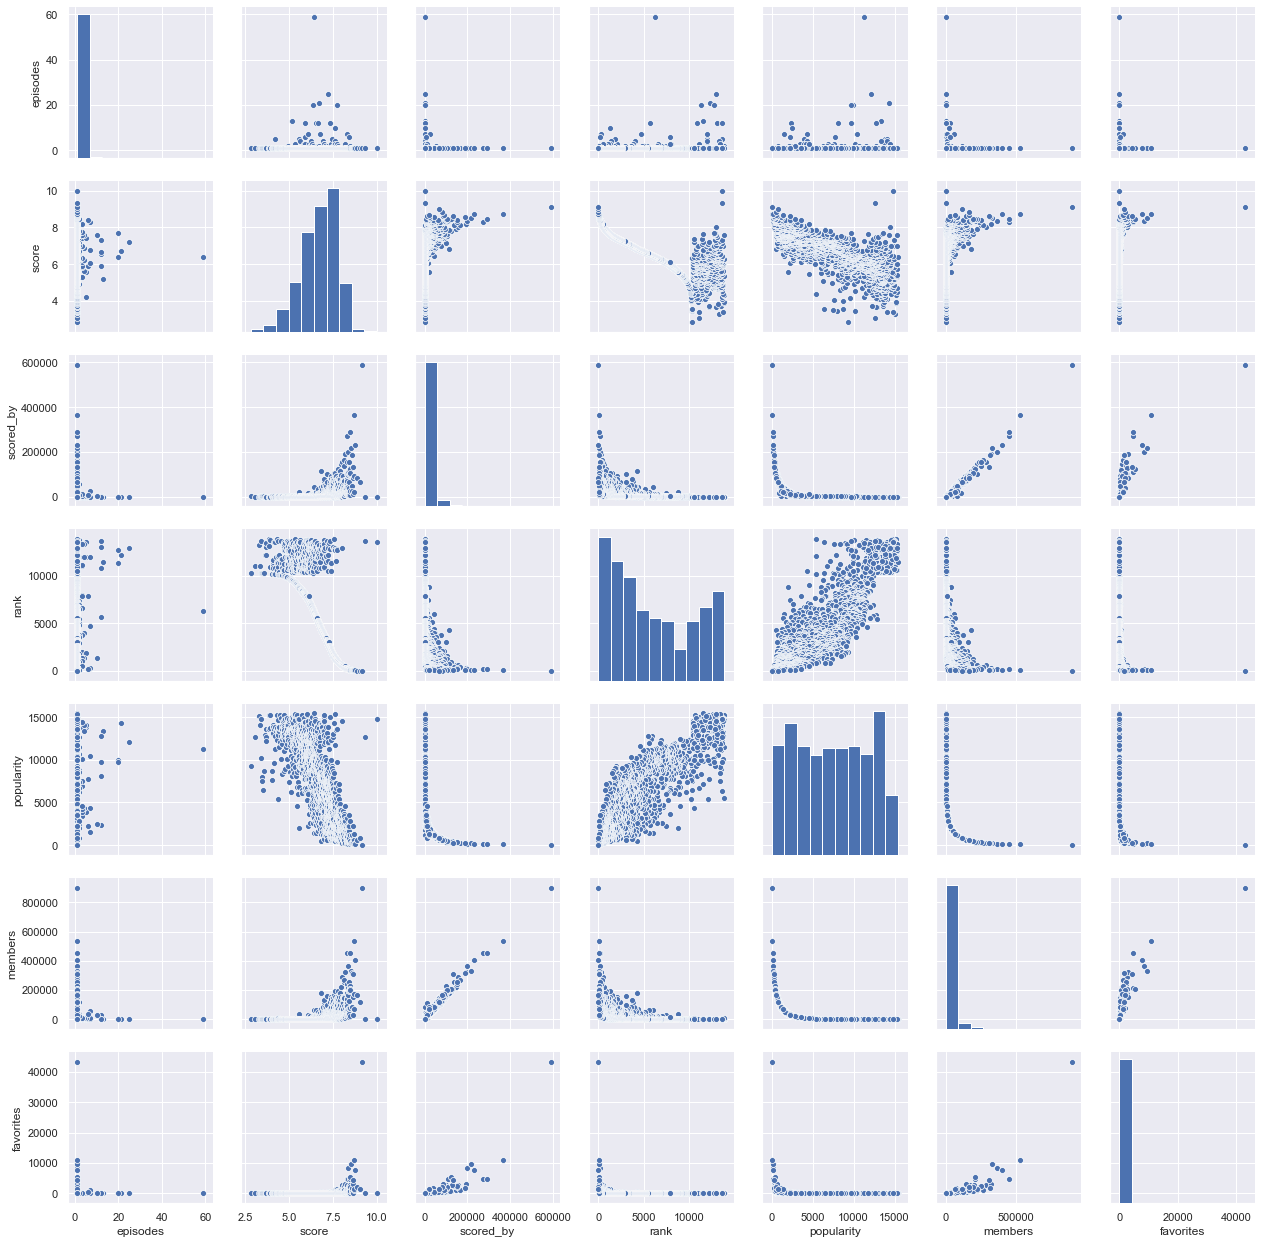

In [294]:
sns.pairplot(data_number_set)

IndexError: index 7 is out of bounds for axis 0 with size 7

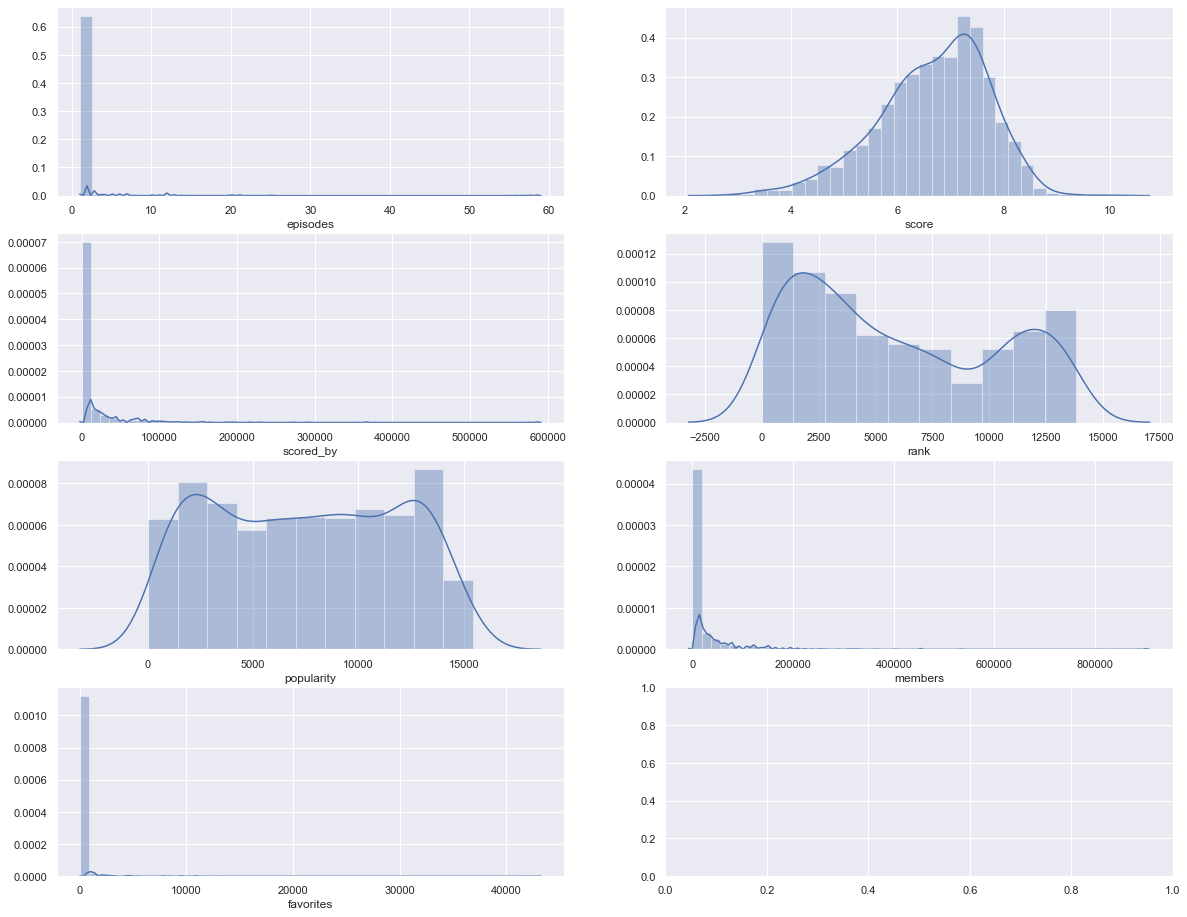

In [551]:
rows = 4
cols = 2
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,16))
col = data_number_set.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(data_number_set[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()

# Rank as it relates to Popularity

In [557]:
#selecting the columns in the data and labeling them 
rank=data.iloc[:,8]
popularity=data.iloc[:,9]



x1 = rank.values.reshape(-1,1)
y1 = popularity.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x1,y1)
y_pred1 = lr.predict(x1)


x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.25)
lr.fit(x1_train,y1_train)
x1_predicted = lr.predict(x1_test)
x1_predicted
y1_predicted = lr.predict(y1_test)



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


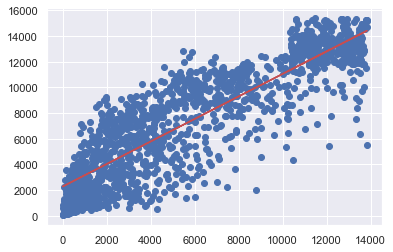

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


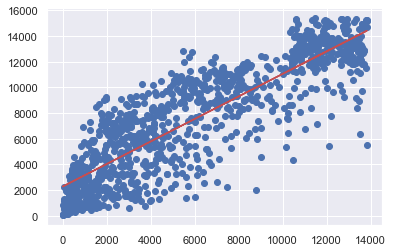

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


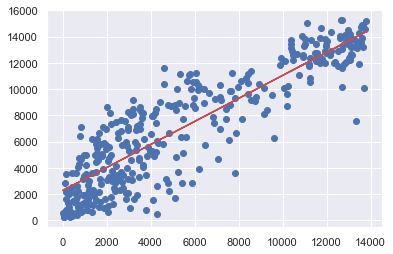

In [546]:
ax1 = fig1.add_subplot(311)
plt.scatter(x1,y1)
plt.plot(x1,y_pred1, color = 'r')
plt.show()


# ploting training model


ax1 = fig1_test.add_subplot(312)
plt.scatter(x1_train,y1_train)
plt.plot(x1,y_pred1, color = 'r')
plt.show()

# ploting testing model

print('Testing the Model')
ax1 = fig1_test.add_subplot(313)
plt.scatter(x1_test,y1_test)
plt.plot(x1,y_pred1, color = 'r')
plt.show()

### Predicted Model


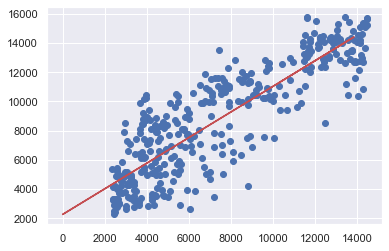

In [558]:
plt.scatter(x1_predicted,y1_predicted)
plt.plot(x1,y_pred1, color = 'r')
plt.show()

In [406]:
data['rank'].max()

13837

In [495]:
len(x1_train) ,len(x1_test)

(1092, 365)

## Evaluating Accuracy

In [332]:
accuracy = lr.score(x1_test,y1_test)
accuracy

0.762812231771264

In [398]:
data.describe()

,episodes,score,scored_by,rank,popularity,members,favorites
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,1.203844,6.676561,10437.638984,5926.275909,7470.475635,19908.463967,152.131091
std,2.032439,1.029966,31648.358812,4362.394256,4371.952930,52695.618225,1289.356313
min,1.000000,2.820000,1.000000,2.000000,20.000000,10.000000,0.000000
25%,1.000000,6.050000,45.000000,2048.000000,3387.000000,271.000000,0.000000
50%,1.000000,6.820000,578.000000,4893.000000,7471.000000,1900.000000,2.000000
75%,1.000000,7.420000,5025.000000,10430.000000,11432.000000,14666.000000,27.000000
max,59.000000,10.000000,588675.000000,13837.000000,15420.000000,900593.000000,43260.000000


In [396]:
data['type'].values

array(['Movie', 'Movie', 'Music', ..., 'Movie', 'ONA', 'Movie'],
      dtype=object)

# Rank in relation to total number of scores

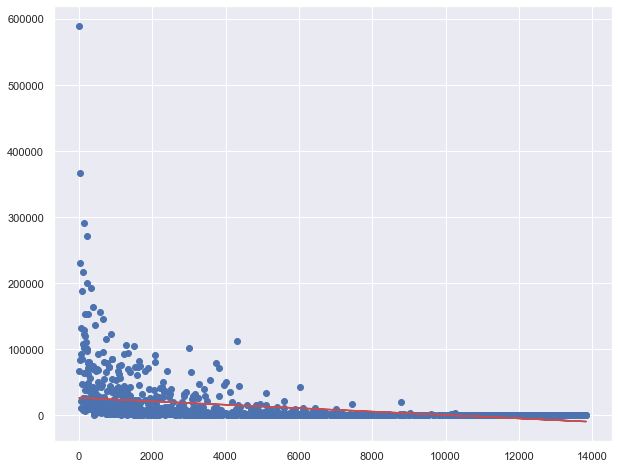

In [527]:
score_by=data.iloc[:,7]

fig2 = plt.figure(figsize=(10,8))
ax2 = fig2.add_subplot(111)
x2 = rank.values.reshape(-1,1)
y2 = score_by.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x2,y2)
y_pred2 = lr.predict(x2)

plt.scatter(x2,y2)
plt.plot(x2,y_pred2, color = 'r')
# plt.xlim(15000,-10)
# plt.ylim(0,370000)
plt.show()

In [488]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.25)
lr.fit(x2_train,y2_train)
lr.predict(x2_test)
accuracy = lr.score(x2_test,y2_test)
accuracy

0.1813294443618656

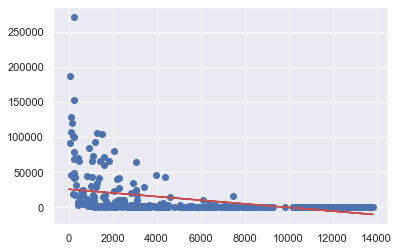

In [530]:
plt.scatter(x2_test,y2_test)
plt.plot(x2,y_pred2, color = 'r')
plt.show()

# Rank to total # of members 

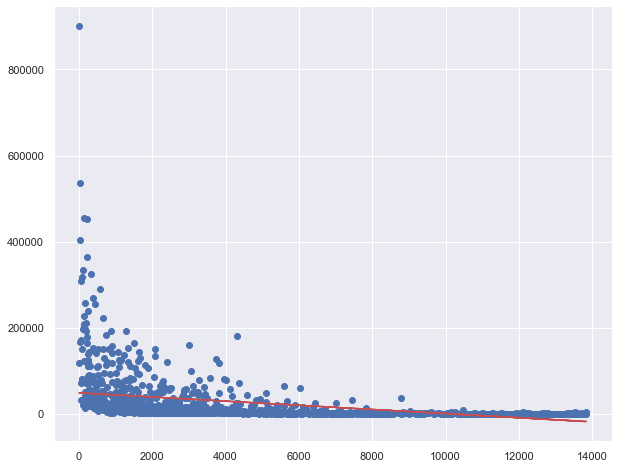

In [526]:
number_of_members = data.iloc[:,10]

fig3 = plt.figure(figsize=(10,8))
ax3 = fig3.add_subplot(111)
x3 = rank.values.reshape(-1,1)
y3 = number_of_members.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x3,y3)
y_pred3 = lr.predict(x3)

plt.scatter(x3,y3)
plt.plot(x3,y_pred3, color = 'r')
# plt.xlim(15000,-10)
# plt.ylim(0,370000)
plt.show()

In [494]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.25)
lr.fit(x3_train,y3_train)
lr.predict(x3_test)
accuracy = lr.score(x3_test,y3_test)
accuracy

0.11640973398230749

# Rank to Score

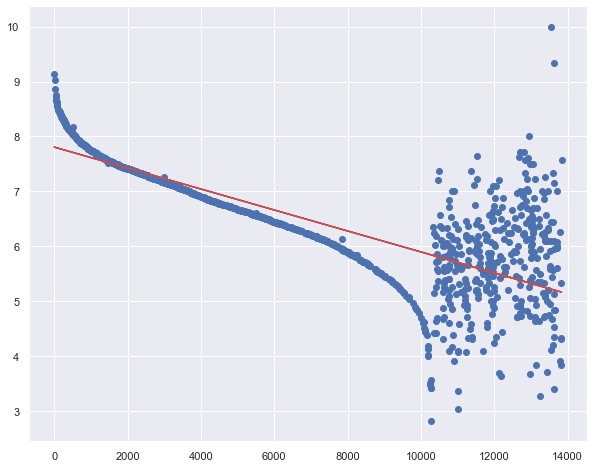

In [525]:
score=data.iloc[:,6]

fig4 = plt.figure(figsize=(10,8))
ax4 = fig4.add_subplot(111)
x4 = rank.values.reshape(-1,1)
y4 = score.values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x4,y4)
y_pred4 = lr.predict(x4)

plt.scatter(x4,y4)
plt.plot(x4,y_pred4, color = 'r')
# plt.xlim(15000,-10)
# plt.ylim(0,370000)
plt.show()

In [502]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4,test_size=0.25)
lr.fit(x4_train,y4_train)
lr.predict(x4_test)
accuracy = lr.score(x4_test,y4_test)
accuracy

0.6648516944183891

In [510]:
# get_Zscores(data['rank'])

In [511]:
# run_ttest(data['score'], 0.05,two_tail=True)


In [512]:
# score_mu = data['score'].mean()
# score_mu

In [513]:
# def get_Zscores(df):
#     mu = df.mean()
#     sigma = df.std()
#     z_scores = [(df.iloc[i]-mu)/sigma for i in range(df.shape[0])]
#     return z_scores
# # Runs a one-sample t-test on data. Population_mean = mu and alpha = a.
# # Pass a bool through 'two_tail' to run a two_tail or one_tail test (True = 2 tail, False = 1 tail)
# def run_ttest(data, alpha, two_tail):
    
#     #calculate parameters
#     n = len(data)
#     s = np.std(data)
#     x_bar = np.mean(data)
#     std_err = s/np.sqrt(n)
#     mu = data.mean()

#     #Where function becomes conditional based on two-tail test or one-tail test
#     if two_tail:
#         #calculate the t-value and p-value
#         t_crit = stats.t.ppf(1-alpha/2, df=n-1)
#         t_p_values = stats.ttest_1samp(a=data, popmean=mu)
#         t = t_p_values[0]
#         p = t_p_values[1]

#         #print results of test
#         if (t>t_crit) and (p<alpha):
#             print(f'Null hypothesis rejected. Results are statistically significant since t-value: {round(t,3)} > critical t-value: {round(t_crit,3)} and p-value: {p} < alpha: {alpha}\n')
#         else:
#             print(f'Null hypothesis not rejected. Results are not statistically significant with t-value: {round(t,3)} < critical t-value: {round(t_crit,3)} and p-value: {p} > alpha: {alpha}\n')

#     else:
#         #calculate the t-value and p-value
#         t_crit = stats.t.ppf(1-alpha, df=n-1)
#         t_p_values = stats.ttest_1samp(a=data, popmean=mu)
#         t = t_p_values[0]
#         p = t_p_values[1]

#         #print results of test
#         if (t>t_crit) and (p<alpha):
#             print(f'Null hypothesis rejected. Results are statistically significant since t-value: {round(t,3)} > critical t-value: {round(t_crit,3)} and p-value: {p} < alpha: {alpha}\n')
#         else:
#             print(f'Null hypothesis not rejected. Results are not statistically significant with t-value: {round(t,3)} < critical t-value: {round(t_crit,3)} and p-value: {p} > alpha: {alpha}\n')

# # Calculates Cohen's D. Suggestion: only pass lists in as data1 and data2
# def Cohen_d(data1, data2):
    
#     #calculate parameters
#     xbar_1, xbar_2 = np.mean(data1), np.mean(data2)
#     var_1, var_2 = np.var(data1), np.var(data2)
#     n1, n2 = len(data1), len(data2)
#     var_p = ((n1-1)*var_1 + (n2-1)*var_2) / (n1+n2-2)
    
#     #calculate Cohen's D
#     d = (xbar_1 - xbar_2) / np.sqrt(var_p)
#     return d




In [ ]:
fig5 = plt.figure(figsize=(10,8))
ax5 = fig5.add_subplot(111)
sns.boxplot(x=boxplot_x, y=boxplot_y, ax=ax5);
ax5.set_title('Figure 1: Home Team Scoring Differential by\nProfessional Leauge for the 2018 Season', {'fontsize' : 20});
ax5.set_ylabel('Point Differential\n(Positive Value Indicates a Home Team Won)', {'fontsize' : 14});